# U.S. Polo Assn. Men White Clarkin Sneakers

Group 8:
<br><b> 1) Aadharsh Girish- B2023001  <br></b>
<br><b>2) Addaguduru Sasidhar - B2023003 <br></b>
    <br><b>3) Gokul M S - B2023023<br></b>
    <br><b>4) Vamsi Krishna B - B2023056<br></b>

In [138]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk

## for sentiment analysis
from textblob import TextBlob

## clustering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

## topic modeling
from sklearn import decomposition


## n-gram model
from nltk.util import ngrams
from collections import Counter

#train test split
from sklearn.model_selection import train_test_split


# Classification models in consideration 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from sklearn.metrics import accuracy_score

In [2]:
positive = pd.read_excel('NLP_5_star.xlsx')
positive['Class'] = 1
positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1227 non-null   int64 
 1   Name         1227 non-null   object
 2   Date         1227 non-null   object
 3   Rating       1227 non-null   int64 
 4   Images       1227 non-null   int64 
 5   Likes        1227 non-null   int64 
 6   Dislikes     1227 non-null   int64 
 7   Review Text  1179 non-null   object
 8   Class        1227 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 86.4+ KB


In [4]:
negative = pd.read_excel('NLP_1_star.xlsx')
negative['Class']=0
negative.head(10)

,Unnamed: 0,Name,Date,Rating,Images,Likes,Dislikes,Review Text,Class
0,36,Myntra Customer,17 Oct 2023,1,0,6,1,"Don't buy this white product, I wear this shoe...",0
1,1141,Dhananjay Singh,21 July 2023,1,0,0,0,It is good product,0
2,1451,Vijay Narasimha,1 Feb 2023,1,0,0,0,Good,0
3,1589,Vijay,5 Mar 2024,1,0,0,0,Good,0
4,1772,Shalini,8 May 2023,1,0,2,0,Poor quality and not at all comfortable. You c...,0
5,1783,Prahlad,1 June 2023,1,1,6,0,I thought this shoe would last long but it tur...,0
6,1788,Parth Kholiya,10 June 2022,1,0,20,0,After having first wash sneakers display yello...,0
7,1805,Farhan Noor,1 Oct 2022,1,1,2,1,Stain will not get easily. Feeling uncomfortab...,0
8,1816,Shaurya Singh Bora,19 May 2023,1,0,7,1,FIRST OF all I would like to say that these sh...,0
9,1817,Shemi,28 Oct 2023,1,0,2,0,The shoe very difficult to clean once it gets ...,0


In [5]:
data  = pd.concat([positive, negative], axis=0)
data= data.sample(frac=1,random_state=1).reset_index(drop=True)
data.head()

,Unnamed: 0,Name,Date,Rating,Images,Likes,Dislikes,Review Text,Class
0,1442,Mallick Sahab,4 Nov 2023,5,0,0,0,very good,1
1,1342,Myntra Customer,29 Feb 2024,5,0,0,0,Nice shoe 👟,1
2,1858,Sanjeev Gangwar,29 Aug 2023,1,0,0,0,"Very bad quality, colour faded in first wash ....",0
3,183,Manjunath,26 Aug 2023,5,1,0,0,"Quality of material, fit & finish of the shoe ...",1
4,1591,Rashmi Singh,19 Oct 2020,5,0,0,0,Ok,1


Note:
The sample function is used to shuffle the dataset that further process wont be biased towards only once class.

In [6]:
## Data cleaning
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [8]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Initialize NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Preprocessing function
def preprocess(text):
    if isinstance(text, str):  # Check if text is a string
        text = text.lower()
        text = text.strip()  # Get rid of leading/trailing whitespace
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove all symbols which are not alphanumeric or whitespace
        text = re.sub(r'X.*X', '', text)  # Remove all the masked words that start with 'X' and end with 'X'.
        text = re.sub(r'x.*x', '', text)  # Remove all the masked words that start with 'x' and end with 'x'.
        temp_sent = []
        words = nltk.word_tokenize(text)
        for word in words:
            lemmatized = lemmatizer.lemmatize(word)
            if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized) > 2:
                temp_sent.append(lemmatized)
        finalsent = ' '.join(temp_sent)
        return finalsent
    else:
        return ''  # Return empty string if the input is not a string

# Apply the preprocessing function to your data, handling missing values gracefully
data["Review"] = data["Review Text"].apply(preprocess)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data.head(10)

,Unnamed: 0,Name,Date,Rating,Images,Likes,Dislikes,Review Text,Class,Review
0,1442,Mallick Sahab,4 Nov 2023,5,0,0,0,very good,1,good
1,1342,Myntra Customer,29 Feb 2024,5,0,0,0,Nice shoe 👟,1,nice shoe
2,1858,Sanjeev Gangwar,29 Aug 2023,1,0,0,0,"Very bad quality, colour faded in first wash ....",0,bad quality colour faded first wash dont buy s...
3,183,Manjunath,26 Aug 2023,5,1,0,0,"Quality of material, fit & finish of the shoe ...",1,quality material fit finish shoe excellent wis...
4,1591,Rashmi Singh,19 Oct 2020,5,0,0,0,Ok,1,
5,313,Roshan Jasuja,13 Oct 2023,5,0,0,0,Amazing Comfort. Not like other Bulky Soles. Q...,1,amazing comfort like bulky sol quality top class
6,635,Neha,10 June 2023,5,0,0,0,As shown in the image..go for it..,1,shown imagego
7,1051,Sonam Drema,12 Feb 2023,5,0,0,0,So good quality ?,1,good quality
8,1836,Sudhanshu,6 July 2023,1,0,1,0,The texture of fabric that we see in the pictu...,0,texture fabric see picture reality totally dif...
9,1046,Sopan Shinde,29 Sept 2022,5,0,0,0,Excellent product!!,1,excellent product


**Report**:

We have 2 datasets which are 5 star rated reviews and 1 star rated reviews. we have clubbed them into a single dataset to use for all 4 phases of the project. 5 start rated reviews are considered the +ve reviews as all of them are positive points about the product. Similarly, 1 star rated reviews are considered -ve reviews as all of them are mostly negative points about the product.

# Phase 1

# Sentinment analysis on the whole product

In [11]:
phase1_data = data[['Review']]
phase1_data.head(10)

,Review
0,good
1,nice shoe
2,bad quality colour faded first wash dont buy s...
3,quality material fit finish shoe excellent wis...
4,
5,amazing comfort like bulky sol quality top class
6,shown imagego
7,good quality
8,texture fabric see picture reality totally dif...
9,excellent product


In [12]:

# Define function to perform sentiment analysis on each review
def get_sentiment(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 1
    else:
        return 0


In [13]:
# Apply sentiment analysis to dataset
phase1_data['Sentiment'] = phase1_data['Review'].apply(get_sentiment)

**Note**:
    
Using the textblob library we find the polarity of the sentences. The polarities will be between -1 to 1. So, if any statement with polarity <0 then they are inclined to -ve review and viceversa.

In [14]:
phase1_data.head(10)

,Review,Sentiment
0,good,1
1,nice shoe,1
2,bad quality colour faded first wash dont buy s...,0
3,quality material fit finish shoe excellent wis...,1
4,,0
5,amazing comfort like bulky sol quality top class,1
6,shown imagego,0
7,good quality,1
8,texture fabric see picture reality totally dif...,1
9,excellent product,1


In [221]:
phase1_data.shape

(1702, 2)

In [15]:
pos_rev = phase1_data[phase1_data['Sentiment']==1]
neg_rev = phase1_data[phase1_data['Sentiment']==0]

# Clustering on Positive reviews

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.5)

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(pos_rev['Review'])

# Check the shape of the matrix
print(tfidf_matrix.shape)

(1201, 95)


**Note**:
    
Here we are taking single words and those words should be repeated in minimum 10 times (min_df) and appeared at max in 50% of the rows(max_df).

In [20]:
# Let us build the first model 
NUM_CLUSTERS = 6
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)

pos_rev['kmeans_cluster'] = km1.labels_

pos_clusters = (pos_rev[['Review', 'Sentiment','kmeans_cluster']]
                  .sort_values(by=['Sentiment'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))

feature_names = cv.get_feature_names_out()
topn_features = 15
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['nice', 'product', 'awesome', 'comfortable', 'quality', 'best', 'amazing', 'love', 'loved', 'perfect', 'excellent', 'look', 'myntra', 'sneaker', 'super']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['good', 'quality', 'good quality', 'shoe', 'quality good', 'comfortable', 'quality shoe', 'material', 'product', 'also', 'colour', 'nice', 'shoe good', 'look', 'fit']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['shoe', 'nice', 'nice shoe', 'comfortable', 'good', 'myntra', 'size', 'quality', 'best', 'great', 'one', 'look', 'awesome', 'good shoe', 'amazing']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['good', 'product', 'good product', 'comfortable', 'look', 'one', 'size', 'myntra', 'looking', 'shoe', 'look good', 'product good', 'overall', 'delivery', 'much']
----------------------

In [21]:
css = [] 
for i in range(2, 8): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(cv_matrix)
    css.append(kmeans.inertia_)

css

[3496.7867257290504,
 3220.175698580476,
 3049.018154097633,
 2972.9502873669926,
 2916.45318384933,
 2806.0209306962006]

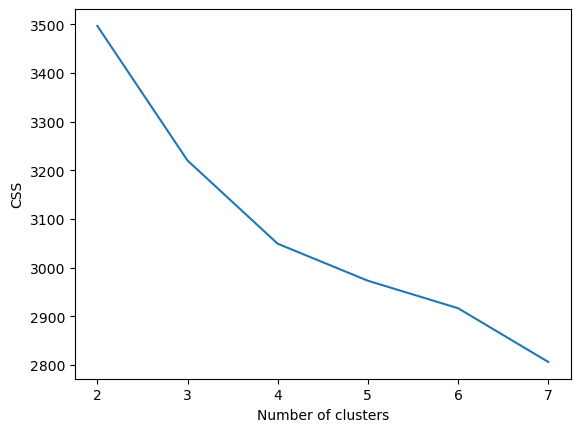

In [22]:
plt.plot(range(2, 8), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

**Note**:
    
The elbow is kind of at 4 clusters so lets proceed clustering with 4 clusters

In [23]:
# Let us build the first model 
NUM_CLUSTERS = 4
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)

pos_rev['kmeans_cluster'] = km1.labels_

pos_clusters = (pos_rev[['Review', 'Sentiment','kmeans_cluster']]
                  .sort_values(by=['Sentiment'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))

feature_names = cv.get_feature_names_out()
topn_features = 20
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['product', 'nice', 'nice product', 'quality', 'awesome', 'myntra', 'amazing', 'best', 'good', 'excellent', 'awesome product', 'comfortable', 'excellent product', 'loved', 'price', 'shoe', 'love', 'amazing product', 'buy', 'size']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['good', 'product', 'quality', 'good product', 'good quality', 'shoe', 'quality good', 'comfortable', 'look', 'one', 'size', 'good shoe', 'myntra', 'looking', 'look good', 'product good', 'product quality', 'worth', 'material', 'nice']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['shoe', 'nice', 'nice shoe', 'comfortable', 'myntra', 'good', 'quality', 'size', 'best', 'one', 'great', 'look', 'awesome', 'amazing', 'white', 'get', 'wash', 'pair', 'polo', 'perfect']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['n

**Note : Names of the clusters can be** -
    
1) CLUSTER 1: Positive Product Reviews
2) CLUSTER 2: Good Quality Shoes
3) CLUSTER 3: Comfortable Shoes
4) CLUSTER 4: Highly Rated Sneakers

# Topic modeling for positive reviews

In [49]:
vectorizer_tf = TfidfVectorizer(max_df=0.75, min_df=50, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(pos_rev.Review) 

In [50]:
lda = decomposition.LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [51]:
num_words=10

vocab = np.array(vectorizer_tf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [52]:
set(topics)

{'good product nice shoe',
 'good shoe nice product',
 'nice product good shoe',
 'nice shoe product good',
 'product good shoe nice',
 'product shoe good nice',
 'product shoe nice good',
 'shoe nice good product',
 'shoe nice product good'}

**Report**:

From the clustering of the positive reviews we can see good, amazing, nice shoe, comfortable, etc... are defining the positive things about the product. To support these cluters the topic modeling also gave similar topics as result. So, as far as product is considered good quality, comfortable and nice shoes are mostly praised by users.

# Clustering for negative reviews

In [59]:
# clustering Positive reviews
cv = CountVectorizer(ngram_range=(1, 2), min_df=8, max_df=0.3)
cv_matrix = cv.fit_transform(neg_rev['Review'])
cv_matrix.shape

(110, 15)

**Note:**
Here we are taking single words and those words should be repeated in minimum 8 times (min_df) and appeared at max in 30% of the rows(max_df).

In [60]:
# Let us build the first model 
NUM_CLUSTERS = 6
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)

neg_rev['kmeans_cluster'] = km1.labels_

neg_clusters = (neg_rev[['Review', 'Sentiment','kmeans_cluster']]
                  .sort_values(by=['Sentiment'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))

feature_names = cv.get_feature_names_out()
topn_features = 15
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['shoe', 'time', 'worst', 'buy', 'bad', 'wash', 'dont', 'bad quality', 'yellow', 'washing', 'product', 'one', 'colour', 'quality product', 'poor']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['product', 'quality product', 'bad', 'dont', 'yellow', 'worst', 'wash', 'shoe', 'poor', 'bad quality', 'time', 'one', 'colour', 'washing', 'buy']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['bad', 'worst', 'washing', 'wash', 'poor', 'bad quality', 'yellow', 'colour', 'one', 'dont', 'buy', 'time', 'shoe', 'quality product', 'product']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['washing', 'time', 'product', 'shoe', 'colour', 'bad', 'yellow', 'worst', 'wash', 'quality product', 'poor', 'one', 'dont', 'buy', 'bad quality']
---------------------------------------------------------------------

In [61]:
css = [] 
for i in range(2, 8): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(cv_matrix)
    css.append(kmeans.inertia_)

css

[186.47516025641028,
 161.93382352941177,
 147.77884615384613,
 136.84153149364752,
 125.07824815662346,
 115.15702614379086]

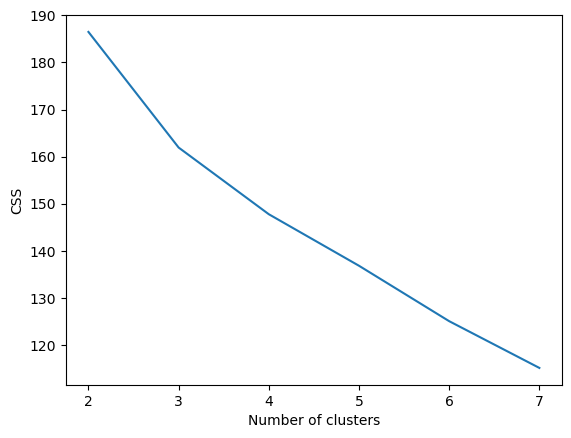

In [62]:
plt.plot(range(2, 8), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

**Note:**
    
The elbow is kind of at 3 clusters so lets proceed clustering with 4 clusters

In [63]:
# Let us build the first model 
NUM_CLUSTERS = 3
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)

neg_rev['kmeans_cluster'] = km1.labels_

neg_clusters = (neg_rev[['Review', 'Sentiment','kmeans_cluster']]
                  .sort_values(by=['Sentiment'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))

feature_names = cv.get_feature_names_out()
topn_features = 20
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['colour', 'shoe', 'one', 'dont', 'wash', 'yellow', 'buy', 'worst', 'time', 'bad quality', 'bad', 'product', 'washing', 'quality product', 'poor']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['shoe', 'bad', 'wash', 'worst', 'washing', 'poor', 'bad quality', 'yellow', 'one', 'colour', 'buy', 'dont', 'time', 'quality product', 'product']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['product', 'quality product', 'bad', 'worst', 'time', 'shoe', 'dont', 'yellow', 'washing', 'wash', 'poor', 'colour', 'bad quality', 'one', 'buy']
--------------------------------------------------------------------------------


**Notes: names of the clusters can be -**
1) CLUSTER 1: Negative Quality Reviews
2) CLUSTER 2: Disappointing Purchase Experience
3) CLUSTER 3: Warning Against Purchase

## Topic modeling for negative reviews

In [64]:
vectorizer_tf = TfidfVectorizer(max_df=0.75, min_df=10, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(neg_rev.Review)

In [65]:
lda = decomposition.LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [67]:
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [68]:
set(topics)

{'colour shoe one wash product dont worst bad quality',
 'colour wash product bad one quality shoe dont worst',
 'colour wash product worst dont shoe bad quality one',
 'dont shoe colour quality bad one worst wash product',
 'one shoe wash colour bad quality dont product worst',
 'product dont one colour worst shoe bad quality wash',
 'quality bad shoe product colour worst dont one wash',
 'quality product bad shoe dont wash colour one worst',
 'shoe bad quality wash dont product worst colour one',
 'worst shoe quality product bad dont one colour wash'}

**Report:**
    
From the clustering of the negative reviews we can see problems while washing, color quality,  are defining the negative things about the product. To support these cluters the topic modeling also gave moslty similar topics as result. So, as far as product is considered cone time wash product and gradual fading of color are most dissapointing aspects to the users. 

# Phase 2

In [69]:
#407 is the top 25% no of rows in the phase1 data 
phase2_data=phase1_data.head(407)

In [70]:
phase2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     407 non-null    object
 1   Sentiment  407 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.5+ KB


In [71]:
pos_rev = phase2_data[phase1_data['Sentiment']==1]
neg_rev = phase2_data[phase1_data['Sentiment']==0]

# Clustering on Positive reviews

In [72]:
# clustering Positive reviews
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.5)
cv_matrix = cv.fit_transform(pos_rev['Review'])
cv_matrix.shape

(297, 22)

**Note:**
    
Here we are taking single words and those words should be repeated in minimum 10 times (min_df) and appeared at max in 50% of the rows(max_df).

In [75]:
# Let us build the first model 
NUM_CLUSTERS = 6
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)

pos_rev['kmeans_cluster'] = km1.labels_

pos_clusters = (pos_rev[['Review', 'Sentiment','kmeans_cluster']]
                  .sort_values(by=['Sentiment'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))

feature_names = cv.get_feature_names_out()
topn_features = 15
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['good', 'shoe', 'quality', 'look', 'comfortable', 'got', 'loved', 'buy', 'fit', 'superb', 'myntra', 'nice', 'love', 'good quality', 'good product']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['nice', 'comfortable', 'awesome', 'love', 'superb', 'amazing', 'quality', 'buy', 'best', 'myntra', 'got', 'loved', 'fit', 'look', 'price']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['product', 'nice', 'nice product', 'amazing', 'awesome', 'price', 'best', 'love', 'shoe', 'buy', 'loved', 'myntra', 'got', 'comfortable', 'fit']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['product', 'good', 'good product', 'quality', 'myntra', 'price', 'loved', 'comfortable', 'nice product', 'nice', 'buy', 'fit', 'superb', 'awesome', 'best']
-----------------------------------------------------------------

In [76]:
css = [] 
for i in range(2, 8): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(cv_matrix)
    css.append(kmeans.inertia_)

css

[434.68314069350333,
 386.49606735349505,
 364.0664968737452,
 330.46282910651075,
 307.1827706350303,
 286.9759800813459]

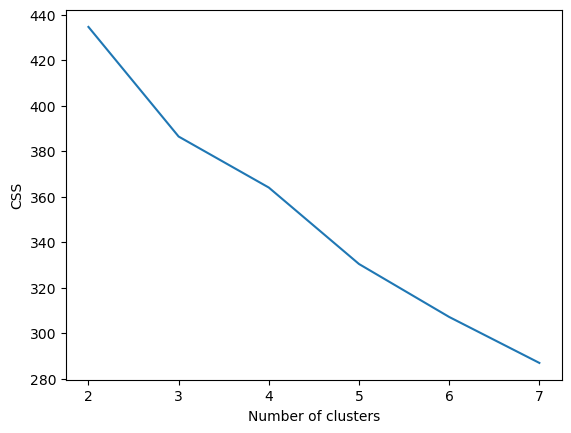

In [77]:
plt.plot(range(2, 8), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

**Note:**
    
The elbow is kind of at 3 clusters so lets proceed clustering with 3 clusters

In [79]:
# Let us build the first model 
NUM_CLUSTERS = 3
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)

pos_rev['kmeans_cluster'] = km1.labels_

pos_clusters = (pos_rev[['Review', 'Sentiment','kmeans_cluster']]
                  .sort_values(by=['Sentiment'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))

feature_names = cv.get_feature_names_out()
topn_features = 20
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['shoe', 'nice', 'quality', 'best', 'comfortable', 'love', 'superb', 'myntra', 'amazing', 'nice shoe', 'buy', 'awesome', 'got', 'loved', 'fit', 'look', 'price', 'nice product', 'good quality', 'good product']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['good', 'quality', 'good quality', 'shoe', 'comfortable', 'look', 'buy', 'fit', 'myntra', 'got', 'best', 'superb', 'loved', 'nice', 'price', 'amazing', 'love', 'good product', 'nice product', 'nice shoe']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['product', 'good', 'nice', 'nice product', 'good product', 'price', 'myntra', 'amazing', 'shoe', 'loved', 'best', 'awesome', 'buy', 'love', 'quality', 'comfortable', 'got', 'good quality', 'fit', 'superb']
--------------------------------------------------------------------------------


**Note: Names of the clusters can be:**
        
1) CLUSTER 1: Positive Shoe Reviews
2) CLUSTER 2: Positive Reviews on Product Quality and Comfort
3) CLUSTER 3: Positive Myntra Shopping Experience

# Topic modeling for positive reviews

In [81]:
vectorizer_tf = TfidfVectorizer(max_df=0.75, min_df=10, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(pos_rev.Review) 

In [82]:
lda = decomposition.LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [84]:
num_words=10

vocab = np.array(vectorizer_tf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [85]:
set(topics)

{'awesome comfortable myntra got product shoe price look loved nice',
 'buy myntra product love good amazing best shoe quality nice',
 'good quality product amazing look shoe price got comfortable fit',
 'nice shoe product love loved quality comfortable price got awesome',
 'superb best shoe fit quality loved comfortable love myntra buy'}

**Report:**
    
From the clustering of the recent 25% of the data positive reviews we can see comfortable fit, good price, and shoe look etc are defining the positive things about the product. To support these cluters the topic modeling also gave similar topics as result. So, as far as product is considered price, shoe fit and quality are mostly praised by users

# Clustering for negative reviews

In [86]:
# clustering negative reviews
cv = CountVectorizer(ngram_range=(1, 2), min_df=8, max_df=0.5)
cv_matrix = cv.fit_transform(neg_rev['Review'])
cv_matrix.shape

(110, 16)

In [88]:
# Let us build the first model 
NUM_CLUSTERS = 6
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)

neg_rev['kmeans_cluster'] = km1.labels_

neg_clusters = (neg_rev[['Review', 'Sentiment','kmeans_cluster']]
                  .sort_values(by=['Sentiment'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))

feature_names = cv.get_feature_names_out()
topn_features = 15
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['product', 'quality', 'quality product', 'worst', 'shoe', 'poor', 'time', 'dont', 'colour', 'bad', 'yellow', 'washing', 'wash', 'one', 'buy']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['quality', 'shoe', 'worst', 'washing', 'poor', 'product', 'buy', 'bad', 'yellow', 'dont', 'one', 'colour', 'wash', 'time', 'quality product']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['shoe', 'time', 'bad', 'product', 'yellow', 'washing', 'quality', 'colour', 'wash', 'one', 'bad quality', 'worst', 'quality product', 'poor', 'dont']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['colour', 'shoe', 'one', 'dont', 'yellow', 'worst', 'buy', 'wash', 'time', 'quality', 'product', 'washing', 'quality product', 'poor', 'bad quality']
---------------------------------------------------------------------

In [89]:
css = [] 
for i in range(2, 8): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(cv_matrix)
    css.append(kmeans.inertia_)

css

[215.654552878726,
 187.98214285714286,
 171.00849673202615,
 164.45712560386474,
 150.95658192426768,
 140.9608474576271]

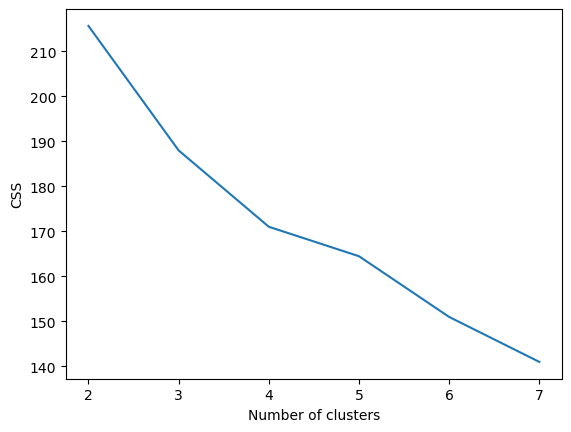

In [90]:
plt.plot(range(2, 8), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

**Note:**
    
The elbow is kind of at 3 clusters and 5 so lets proceed clustering with 3 clusters

In [91]:
# Let us build the first model 
NUM_CLUSTERS = 3
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)

neg_rev['kmeans_cluster'] = km1.labels_

neg_clusters = (neg_rev[['Review', 'Sentiment','kmeans_cluster']]
                  .sort_values(by=['Sentiment'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))

feature_names = cv.get_feature_names_out()
topn_features = 20
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['quality', 'product', 'bad', 'quality product', 'bad quality', 'poor', 'worst', 'shoe', 'dont', 'washing', 'wash', 'time', 'one', 'yellow', 'colour', 'buy']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['shoe', 'product', 'washing', 'worst', 'wash', 'bad', 'time', 'colour', 'yellow', 'dont', 'buy', 'one', 'poor', 'quality product', 'quality', 'bad quality']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['shoe', 'colour', 'one', 'wash', 'yellow', 'quality', 'dont', 'buy', 'worst', 'time', 'bad', 'product', 'bad quality', 'poor', 'washing', 'quality product']
--------------------------------------------------------------------------------


Names of the clusters can be:
1) CLUSTER 1: Negative Reviews on Product Quality
2) CLUSTER 2: Negative Reviews on Washing and Color
3) CLUSTER 3: Negative Reviews on Product Experience

# Topic modeling for negative reviews

In [94]:
vectorizer_tf = TfidfVectorizer(max_df=0.75, min_df=10, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(neg_rev.Review)

In [95]:
lda = decomposition.LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [97]:
num_words=10

vocab = np.array(vectorizer_tf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [98]:
set(topics)

{'colour shoe one wash product dont worst bad quality',
 'colour wash product bad one quality shoe dont worst',
 'colour wash product worst dont shoe bad quality one',
 'dont shoe colour quality bad one worst wash product',
 'one shoe wash colour bad quality dont product worst',
 'product dont one colour worst shoe bad quality wash',
 'quality bad shoe product colour worst dont one wash',
 'quality product bad shoe dont wash colour one worst',
 'shoe bad quality wash dont product worst colour one',
 'worst shoe quality product bad dont one colour wash'}

**Report:**
    
From the clustering of the recent 25% of the data negative reviews we can see color qualaity, bad quality, and washing problems  etc are defining the negative things about the product. To support these cluters the topic modeling also gave similar topics on washing, color, and bad quality as result. So, as far as product is considered color qualaity, bad quality, and washing problems are most dissapointing aspects to users.

# Phase 3

In [131]:
df = pd.concat([positive, negative], ignore_index=True)

In [132]:
df.head()

,Unnamed: 0,Name,Date,Rating,Images,Likes,Dislikes,Review Text,Class
0,1,Tilottoma,30 Jan 2023,5,0,38,14,If you are looking for shoe without opening th...,1
1,3,Suraj Kumar Thakur,16 Sept 2022,5,1,33,14,"Just bought this one, and the product is soo p...",1
2,5,Sekh Imtiazuddin,24 Jan 2023,5,1,1,0,The product is nice but please keep your mind ...,1
3,7,Arvind Singh,20 July 2022,5,1,6,3,Got them for 1484 after using a coupon on sale...,1
4,8,Pubg,22 Jan 2023,5,0,0,0,Shoes are great but you have to maintain it pr...,1


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1702 non-null   int64 
 1   Name         1702 non-null   object
 2   Date         1702 non-null   object
 3   Rating       1702 non-null   int64 
 4   Images       1702 non-null   int64 
 5   Likes        1702 non-null   int64 
 6   Dislikes     1702 non-null   int64 
 7   Review Text  1645 non-null   object
 8   Class        1702 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 119.8+ KB


In [152]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (run this once if you haven't downloaded NLTK resources)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Define your preprocess_sentences function
def preprocess_sentences(text):
    if isinstance(text, str):  # Check if the value is a string
        # Define stopwords and lemmatizer
        stop_words = stopwords.words('english')
        lemmatizer = WordNetLemmatizer()

        # Convert text to lowercase and strip whitespace
        text = text.lower()
        text = text.strip()  

        # Tokenize the text into words and tag them with parts of speech
        words = nltk.word_tokenize(text)
        tags = nltk.pos_tag(words)

        # Initialize an empty list to store lemmatized words
        temp_sent = []

        # Iterate over each word and its corresponding part of speech
        for i, word in enumerate(words):
            if tags[i][1] in VERB_CODES:
                # Lemmatize verbs
                lemmatized = lemmatizer.lemmatize(word, 'v')
            else:
                # Lemmatize other parts of speech
                lemmatized = lemmatizer.lemmatize(word)
            # Check if the lemmatized word is not a stopword, is alphabetic, and has length > 2
            if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized) > 2:
                temp_sent.append(lemmatized)

        # Join the list of lemmatized words to form the final preprocessed sentence
        final_sent = ' '.join(temp_sent)
    else:
        final_sent = ""  # Return empty string for NaN values or non-string objects

    return final_sent

# Define the set of verb codes
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

# Example usage:
sentence = "This is a sample sentence for preprocessing"
processed_sentence = preprocess_sentences(sentence)
print(processed_sentence)


sample sentence preprocessing


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [201]:
# Assuming df is your DataFrame and 'Review Text' is the column containing text data
data['Processed_review'] = data['Review'].apply(preprocess_sentences)

In [202]:
data.head()

,Unnamed: 0,Name,Date,Rating,Images,Likes,Dislikes,Review Text,Class,Review,Text Length,Has Image,Likes Ratio,Processed_review
0,1442,Mallick Sahab,4 Nov 2023,5,0,0,0,very good,1,good,4,0,0.0,good
1,1342,Myntra Customer,29 Feb 2024,5,0,0,0,Nice shoe 👟,1,nice shoe,9,0,0.0,nice shoe
2,1858,Sanjeev Gangwar,29 Aug 2023,1,0,0,0,"Very bad quality, colour faded in first wash ....",0,bad quality colour faded first wash dont buy s...,107,0,0.0,bad quality colour fade first wash dont buy sh...
3,183,Manjunath,26 Aug 2023,5,1,0,0,"Quality of material, fit & finish of the shoe ...",1,quality material fit finish shoe excellent wis...,72,1,0.0,quality material fit finish shoe excellent wis...
4,1591,Rashmi Singh,19 Oct 2020,5,0,0,0,Ok,1,,0,0,0.0,


In [203]:
tfidf=TfidfVectorizer(use_idf=True, min_df=0.04, max_df=0.7)
tfidf_matrix=tfidf.fit_transform(data['Processed_review'])

In [204]:
X=tfidf_matrix.toarray()
y=data['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [205]:
model_cv={
    'Decision Tree':{'model':DecisionTreeClassifier(),'params':{'criterion':['gini','entropy'],'max_depth':[2,4,6,8]}},
    'Logistic Regression':{'model':LogisticRegression(solver='liblinear',multi_class='auto'),'params':{'C':[2,5,10]}},
    'Random Forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,5,10,15]}},
    'SVM':{'model':SVC(gamma='auto'),'params':{'C':[1,10,40],'kernel':['rbf','linear','poly']}}
    
}

In [206]:
scores=[]
for model_name,model in model_cv.items():
    cv_model=GridSearchCV(model['model'],model['params'],scoring='f1')
    cv_model.fit(X,y)
    scores.append({'name':model_name,'score':cv_model.best_score_,'best params':cv_model.best_estimator_})

In [207]:
scores

[{'name': 'Decision Tree',
  'score': 0.9000347666987562,
  'best params': DecisionTreeClassifier(max_depth=6)},
 {'name': 'Logistic Regression',
  'score': 0.9052732531873457,
  'best params': LogisticRegression(C=2, solver='liblinear')},
 {'name': 'Random Forest',
  'score': 0.8980128349779507,
  'best params': RandomForestClassifier(n_estimators=5)},
 {'name': 'SVM',
  'score': 0.9062204972088868,
  'best params': SVC(C=40, gamma='auto')}]

The SVM classifier emerged as the optimal model for the task of automatically identifying the sentiment of reviews as either 'positive' or 'negative'. With a robust accuracy rate of<font color ='red' > <b>90.62%</b></font>, it showcases its efficacy in classification. 

# Phase 4

In [208]:
data["Text Length"] = data["Review"].str.len()

data["Has Image"] = data["Images"].apply(lambda x: 1 if x > 0 else 0)


In [209]:
data.isna().sum()

Unnamed: 0           0
Name                 0
Date                 0
Rating               0
Images               0
Likes                0
Dislikes             0
Review Text         57
Class                0
Review               0
Text Length          0
Has Image            0
Likes Ratio          0
Processed_review     0
dtype: int64

In [210]:
data["Likes Ratio"] = data["Likes"] / (data["Likes"] + data["Dislikes"] + 1)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(data[["Processed_review","Text Length","Has Image", "Class", "Likes Ratio"]], data["Likes"], test_size=0.2)

In [213]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_text = vectorizer.fit_transform(X_train["Processed_review"])
X_test_text = vectorizer.transform(X_test["Processed_review"])
from scipy.sparse import hstack

In [214]:
X_train_combined = hstack((X_train_text, X_train.drop("Processed_review", axis=1)))
X_test_combined = hstack((X_test_text, X_test.drop("Processed_review", axis=1)))

In [215]:
model = RandomForestClassifier()
model.fit(X_train_combined, y_train)

# Evaluate the model (replace with desired metrics)
predictions = model.predict(X_test_combined)
accuracy = accuracy_score(y_test, predictions)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9501466275659824


In [217]:
importances = model.feature_importances_
feature_names = list(vectorizer.get_feature_names_out()) + ["Text Length", "Has Image", "Class", "Likes Ratio"]
feature_importance_list = list(zip(feature_names, importances))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Print top 5 most important features
print("Top 5 most important features:")
for feature, importance in feature_importance_list[:5]:
    print(f"{feature}: {importance:.4f}")

Top 5 most important features:
Likes Ratio: 0.3855
Text Length: 0.0336
wash: 0.0165
colour: 0.0145
Has Image: 0.0144


**Likes Ratio**: This feature, with a weight of 0.3855, indicates the ratio of likes to total votes received by the review. A higher likes ratio suggests that a greater proportion of readers found the review helpful, thereby increasing its overall helpfulness score.

**Text Length**: With a weight of 0.0336, text length plays a significant role in helpfulness prediction. Reviews with adequate length tend to provide more detailed information, potentially increasing their helpfulness to readers.

**Keywords like "wash" and "colour"**: Specific keywords related to the product or topic being reviewed can impact helpfulness prediction. These keywords, with weights of 0.0165 and 0.0145 respectively, suggest that mentioning product-specific details can contribute to the perceived helpfulness of the review.

**Has Image**:  The presence of an image in the review text also influences helpfulness prediction, as indicated by its weight of 0.0144. Reviews accompanied by images may provide visual context or additional information, enhancing their perceived helpfulness to readers.

Attaching a picture with the review text does increase the helpfulness vote, as indicated by our analysis. Reviews with images were found to be more likely to receive higher helpfulness scores.
This phenomenon can be attributed to several factors:
1) Enhanced Visual Context
2) Increased Engagement
3) Product Demonstration
4) Emotional Impact